#My First Decision Tree! :)

Sources used to develop this can be explored in greater detail here:
* [Implementing Machine learning models on Iris Dataset.](https://medium.com/@harimittapalli/implementing-machine-learning-models-on-iris-dataset-a08e017dd3ee)
* [Visualizing Decision Trees with Python (Scikit-learn, Graphviz, Matplotlib)](https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc)
* [SciKit Learn Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
* [Beautiful decision tree visualizations with dtreeviz](https://https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180)

Alright nerds lets get started

In [62]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q sklearn

#Making Graphs

We will create a simple ML algorithm using the Iris dataset in seaborn to predict what class of iris a given instance is, when the user inputs an item such as a given iris's sepal and petal length/width

In [63]:
#import your packages

import numpy as np
import pandas as pd
import seaborn as sns
import jupyter as jp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl


In [64]:
#load the dataset

iris_data = sns.load_dataset("iris")


#prints the first 5 rows of the dataset
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
#describe the dataset

iris_data.describe()

#we have 150 observations in this dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
#number of observations for each column

iris_data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

Great! We have our dataset. Now lets create some graphs to visualize our data. We will do this for each of our attributes (i.e. petal and sepal length/width). Let's mess around with a few different graphs we could make.  

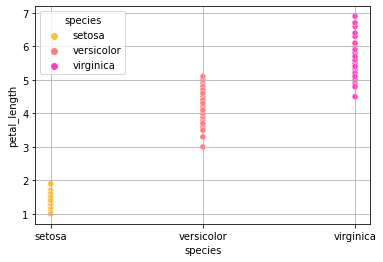

In [67]:
plt = sns.scatterplot( x = 'species', y = 'petal_length', hue='species', palette = 'spring_r', data=iris_data)
plt.grid(True)


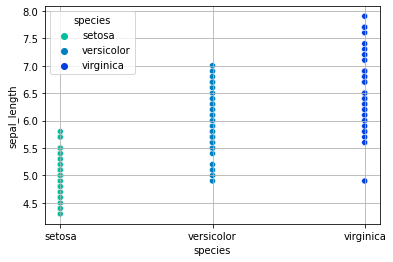

In [68]:

plt = sns.scatterplot( x = 'species', y = 'sepal_length', hue='species', palette = 'winter_r', data=iris_data)

#plt.style.use('ggplot')
plt.grid(True)

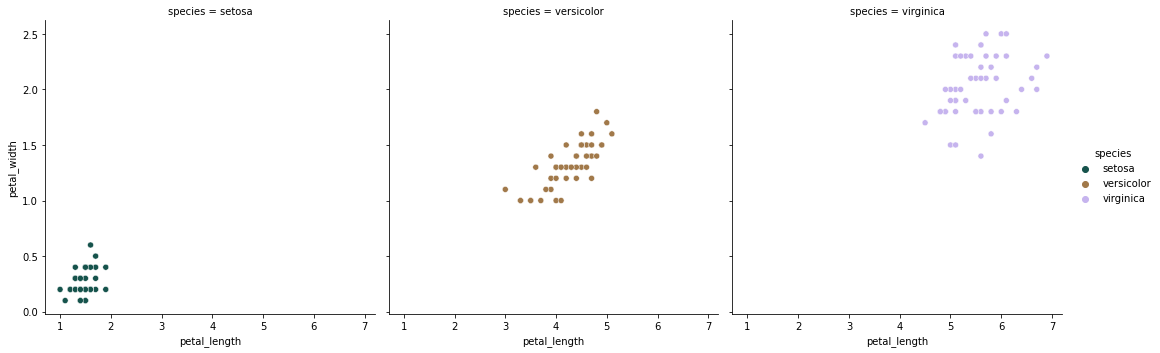

In [69]:

#plt.style.use('ggplot')
#this makes our plots look a little nicer

petals = sns.relplot(x = 'petal_length', y = 'petal_width', col = 'species', hue = 'species', palette = 'cubehelix', data = iris_data)
plt.grid(True)
#plt.suptitle('Petal Length x Petal Width by species', fontsize=10)
#adds an all encompassing title


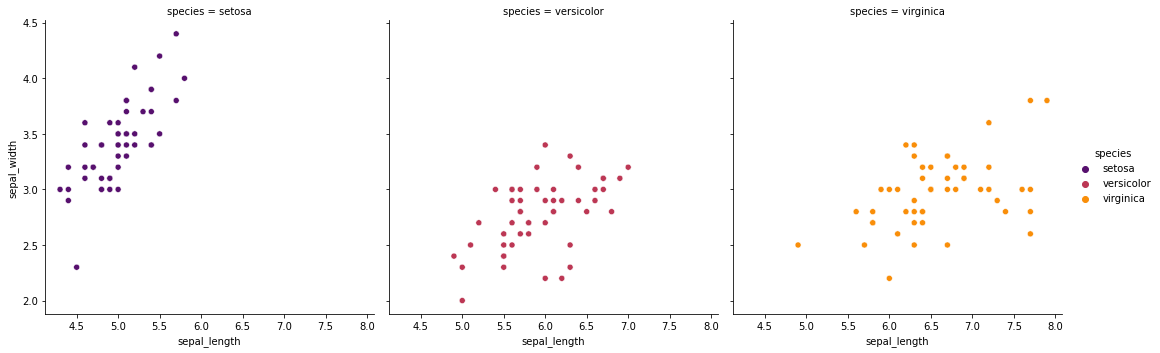

In [70]:
sepals = sns.relplot(x = 'sepal_length', y = 'sepal_width', col='species', hue = 'species', palette = 'inferno', data = iris_data);
#plt.style.use('ggplot')
plt.grid(True);
print(sepals);
#other palettes I want to try: 
#cube, helix icefire, inferno, jet, magma, flare, Spectral, cividis, etc

Okay, let's make one final graph that plots petal length x petal width and has all three species in one grid. 


[Text(0.5, 1.0, 'Petal Length x Petal Width for Three Species of Iris')]

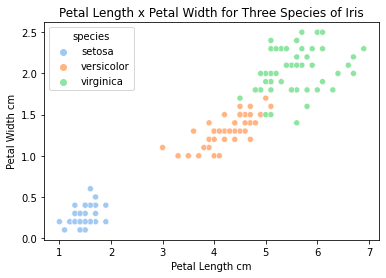

In [71]:
petal_sepal = sns.scatterplot(x = 'petal_length', y ='petal_width', hue ='species', palette = 'pastel', data = iris_data);

petal_sepal.set(xlabel = 'Petal Length cm', ylabel = 'Petal Width cm');
petal_sepal.set(title = 'Petal Length x Petal Width for Three Species of Iris')

Cool! So we made some graphs and visualized our data. Lets build an easy decision tree.

#Creating our Decision tree


In [72]:
#first we need to import all our shit again just in case it didn't carry over
#import your packages

import numpy as np
import pandas as pd
import seaborn as sns
import jupyter as jp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl


In [73]:
#load the dataset

iris_data = sns.load_dataset('iris')


As a refresher, lets look at some metadata (information about our dataset). We will look at things like how many records our dataset has, what type of data we are working with (i.e. strings, intergers, floats, boolean), etc. 

In [74]:
iris_data.info() 

#tells us columns, their respective interger index, 
#whether they have any null values, and what data type is contained by that column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To make our data easier to work with, we will transform our dataset into a pandas Data Frame. 

In [76]:
iris_df = pd.DataFrame(iris_data)
#creating a pandas DataFrame for easy indexing

In [77]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Great! We successfully made our data a dataframe. We can see that the iris_data head and iris_df head produce the same results. 

In [78]:
#below is a quick example in indexing your dataframe

In [79]:
iris_df.iloc[1, :]

#gives us the second observation, because numeric indexing in python begins with 0 (see table above)

#.iloc[#row splicing, #column splicing]
#so .iloc[1, :] gives us the second row, and the : means we wants ALL columns
#associated with that row. If you only want the first two columns (sepal length and sepal width)
#for the second observation, you would use
#iris_df.iloc[1, 0:2]

sepal_length       4.9
sepal_width        3.0
petal_length       1.4
petal_width        0.2
species         setosa
Name: 1, dtype: object

In [80]:
iris_df.iloc[1, 0:2]
#you would use 0:2 and NOT 0:1 because Python thinks
#you want to stop before the 2nd position, which would be the third column.
#keep this in mind!
#you can check both of these .iloc examples in the 
#iris_df header to verify the output.

sepal_length    4.9
sepal_width     3.0
Name: 1, dtype: object

So now we need gather observations to train our model on. We want to divide our full dataset into a training and testing set. Since we have 150 obersevations, with 50 each being from our 3 species of iris, we should use about 20% of our total observations per species. This comes out to about 10 observations. I want to select observations at random, incase they are sorted in some way. We can use the randint function to randomly select observations. 

Let's try to get python to display the full dataset so we can see how we need to index our

In [81]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#print(iris_df)
#the above comment will print all 150 observations of the dataframe. 
#remove the # symbol in front of the print statement to view the dataframe. 

Great! We can see the full dataset now. 0-49 are the positions for the setosa iris. 50-99 we have versicolor. 100-149 is our virginica species. 

Okay great, we've got splicing and indexing down. Lets create 3 test sets that contain 10 randomly chosen intergers that correlate with the 3 species observed in our data. The three species are: 

*   setosa
*   versicolor
*   virginica



In [82]:
#before we move on!!! We must add a target column to our dataframe! This is need for our decision tree. 
#we will also add a name column to add the unique identifier

iris_df.insert(5, 'target', 0)


In [83]:
#lets check to make sure our target column was added at the end of our dataframe

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [84]:
#inserting the numeric index as a column

#num_index = pd.Series(index = iris_df) 

iris_df['num_index'] = np.arange(iris_df.shape[0])

#iris_df.drop(['(0, num_index)'], axis=1)


In [85]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target,num_index
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,2
3,4.6,3.1,1.5,0.2,setosa,0,3
4,5.0,3.6,1.4,0.2,setosa,0,4


We can now use the train_test_split function that sklearn has built in

In [86]:
from sklearn.model_selection import train_test_split


dt_train, dt_test =train_test_split(iris_df,test_size=0.2)

We will use 20% of our data to train our decision tree, as exhibited above. We can check the size of our respective training and testing datasets below

In [87]:
dt_train.shape, dt_test.shape

((120, 7), (30, 7))

We now need to split the training and testing datasets into input and output datasets. Our input will be the sepal length/width, as well as the petal length/width. Our ouput will be the species. 

In [88]:
dt_train_x = dt_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

dt_train_y = dt_train['species']

dt_test_x = dt_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

dt_test_y = dt_test['species']

Great! We now have everything needed to train our decision tree. Let's give it a go!

In [89]:
import sys

if 'google.colab' in sys.modules:
    !pip install -q sklearn

from sklearn.tree import DecisionTreeClassifier
#from sklearn import DecisionTreeClassifier

species_id_tree = DecisionTreeClassifier()

#an empty decision tree

In [90]:
species_id_tree.fit(dt_train_x, dt_train_y)

DecisionTreeClassifier()

Cool! Our tree has been trained using our training datasets. It knows that it will recieve an input of numeric values, and it wants an output of species.

In [91]:
species_id = species_id_tree.predict(dt_test_x)

#we can now calculate the accuracy of these predictions

species_id_accuracy = skl.metrics.accuracy_score(species_id,dt_test_y)

print("Decision tree species prediction accuracy =", species_id_accuracy)

Decision tree species prediction accuracy = 0.9666666666666667


Our decision tree correclty predicited most of the input observations. Let's take a look at all of the info we fed it and it's predictions. 

In [92]:
final_df = pd.concat([dt_test_x, dt_test_y], axis=1)

final_df

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,virginica
48,5.3,3.7,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
11,4.8,3.4,1.6,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor
2,4.7,3.2,1.3,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
76,6.8,2.8,4.8,1.4,versicolor


In [93]:
#final_df.insert(column='predicted_species', value=species_id_ser, loc=5)

final_df['predicted_species'] = species_id

Okay now that we've joined our test input, test output, and decision tree results, lets take a look at it all together!

In [94]:

final_df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
128,6.4,2.8,5.6,2.1,virginica,virginica
48,5.3,3.7,1.5,0.2,setosa,setosa
79,5.7,2.6,3.5,1.0,versicolor,versicolor
11,4.8,3.4,1.6,0.2,setosa,setosa
54,6.5,2.8,4.6,1.5,versicolor,versicolor
2,4.7,3.2,1.3,0.2,setosa,setosa
97,6.2,2.9,4.3,1.3,versicolor,versicolor
67,5.8,2.7,4.1,1.0,versicolor,versicolor
3,4.6,3.1,1.5,0.2,setosa,setosa
76,6.8,2.8,4.8,1.4,versicolor,versicolor


We can print a dataframe with only the wrongly identified values to see which ones were not accurately identified

In [95]:
incorrect_id = final_df.loc[dt_test['species'] != species_id]

incorrect_id

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
119,6.0,2.2,5.0,1.5,virginica,versicolor


Great! We made our first decision tree! In the next section we will visualize our machine learning algorithm to get a better grasp on what just happened. 


#Visualizing our Decision Tree

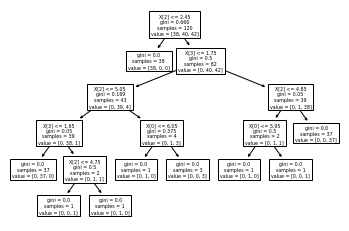

<Figure size 4320x4320 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt
from sklearn import tree

tree_diagram = tree.plot_tree(species_id_tree);

plt.figure(figsize=(60,60));

#the ; at the end removes all the text. 
#try running the code without it to see what i mean

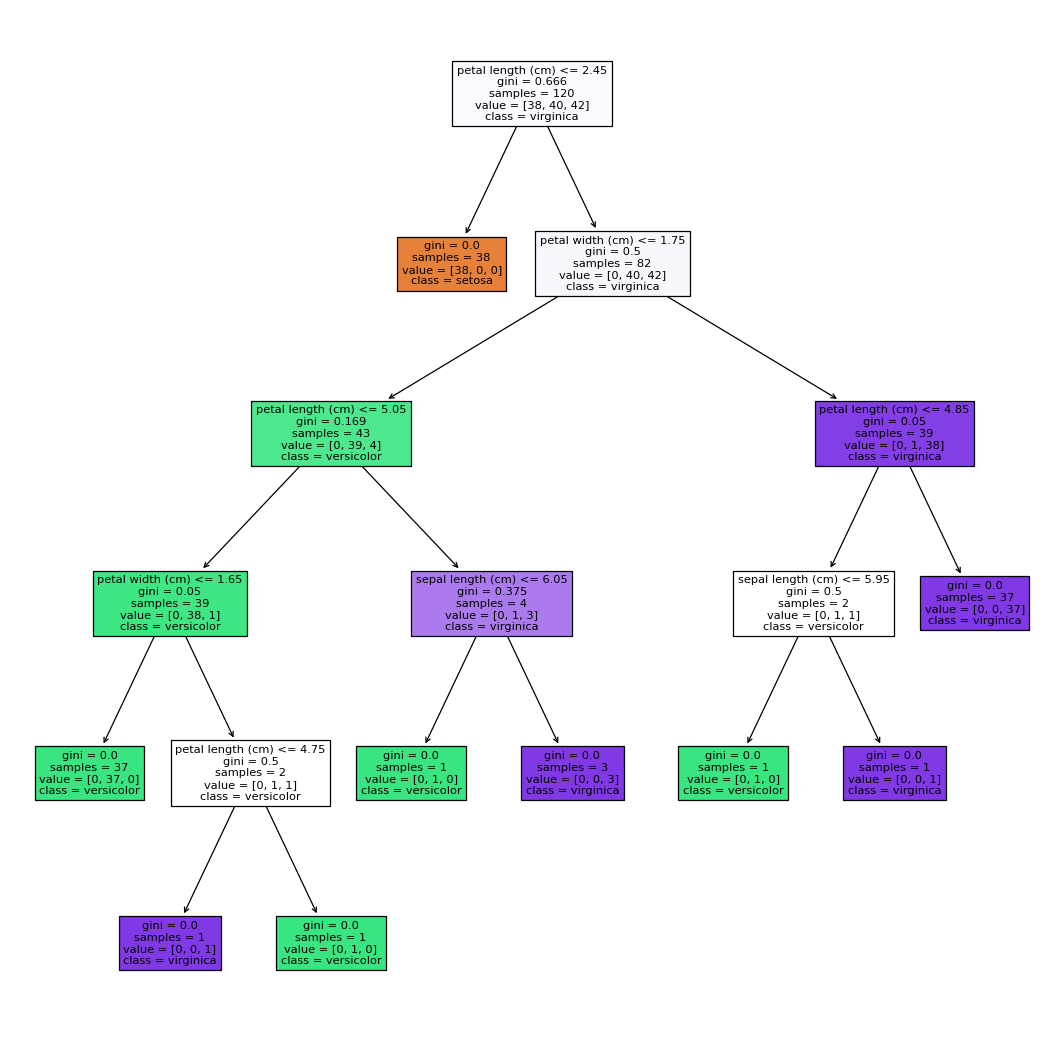

In [97]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=90)
tree.plot_tree(species_id_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True); #filled = true indicates we want a color coded class.

Some things to note about the above tree:
gini index is an impurity measure that "calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly" 
[source](https://https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8)

Let's look at some other ways to visualize decision trees!

In [98]:

import sys

if 'google.colab' in sys.modules:
  %pip install -q dtreeviz


from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import graphviz
import pandas as pd
import numpy as np

#below line installs packages in google collab
"""
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
"""



"\nimport sys\n\nif 'google.colab' in sys.modules:\n  !pip install -q dtreeviz\n"

Below is a shorter way to train a decision tree, and then make a tree visualization using dtreeviz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


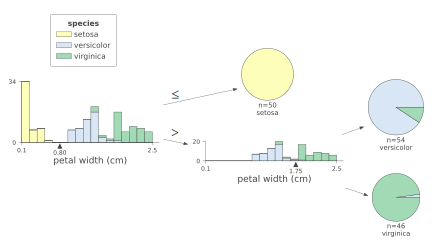

In [101]:
iris_dt = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
iris_dt.fit(X_train, y_train)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

tree_diagram2 = dtreeviz(iris_dt, 
               X_train, 
               y_train,
               target_name='species',
               feature_names= fn, 
               class_names= cn, 
               histtype= 'barstacked',  # barstackes is default
               orientation = 'LR')  # LR = left to right orientation


tree_diagram2